In [1]:
S = collect(0:100)
A = zeros(101)
r = zeros(101) 
r[101] = 1
#101 = $100 or termination state meaning reward is 1 else 0
p_h = 0.4

function value_iteration(V, π)
    γ = 1.0    # discount factor
    θ = 1e-6   # tolerance for convergence
    k = 0      # iteration/sweep
    while true
        δ = 0.0
        for s = 1:(length(S) - 1)
            v = V[s]
            stakes = collect(1:(min(s, 100-s) + 1))  #Range of values to bet
            q = zeros(length(A))
            for a in stakes
                # Sprime could be state + bet or state - bet
                if (s - a) < 1
                    break
                else
                    q[a] = p_h * (r[s+a] + V[s+a]*γ) + (1 - p_h) * (r[s-a] + V[s-a]*γ)
                end
            end
            V[s], greedy_action = findmax(q)
            π[s, greedy_action] = 1
            π[s, setdiff(stakes, greedy_action)] .= 0.0
            δ = max(δ, abs(v - V[s]))
        end
        k += 1
        if δ < θ
            break
        end
    end
    println(k, " sweeps.")
    return V, π
end
V = zeros(length(S))
policy = fill(0, length(S), length(A))
V, policy = value_iteration(V, policy)

12 sweeps.


([0.0, 0.002065572744163598, 0.005164058667170925, 0.009225414495828551, 0.012910146667927311, 0.017385337235688764, 0.02306366304633331, 0.027814050785202285, 0.03227536666981828, 0.03768499817905139  …  0.821549050730805, 0.8348748468171712, 0.8519785343211755, 0.8720731550081634, 0.8844821702940684, 0.9009249080903027, 0.9232438930048981, 0.9405549448541816, 0.9643329669125089, 0.0], [1 0 … 0 0; 1 0 … 0 0; … ; 1 0 … 0 0; 0 0 … 0 0])

In [2]:
policy

101×101 Matrix{Int64}:
 1  0  0  0  0  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 1  0  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  1  0  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  1  0  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  1  0  0  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  1  0  0  0  0  0  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  1  0  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  1  0  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  1  0  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  1  0  0  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  1  0  0  0  …  0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  1  0  0     0  0  0  0  0  0  0  0  0  0  0  0
 0  0  0  0  0  0  0  0  0  0  0  1  0   

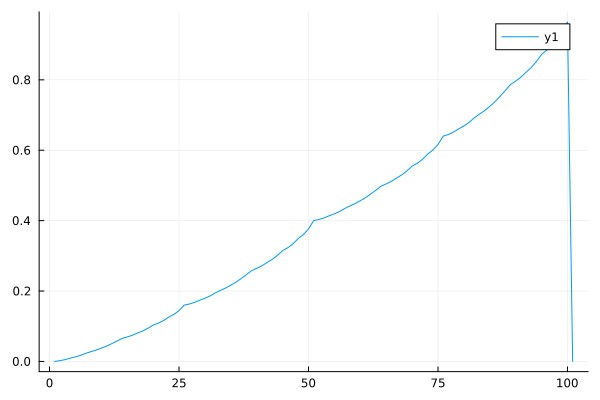

In [3]:
using Plots

plot(V)

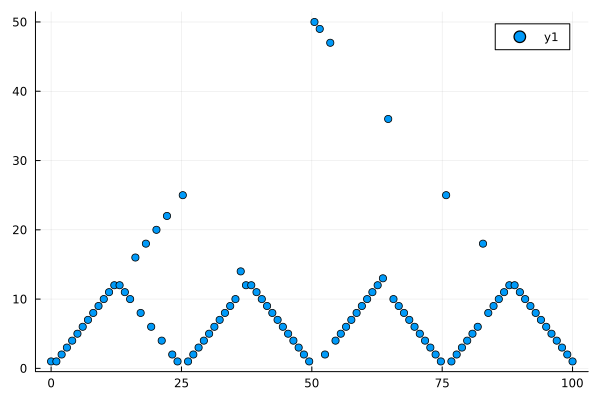

In [4]:
using Plots

ys = zeros(100)
for s = 1:100
    k = 0
    for y in policy[s,:]
        if y == 1
            ys[s] = k + 1
            break 
        end
        k = k+1
    end
end
x = range(0, 100, length=100)
scatter(x, ys)
#print(ys)

In [361]:
print(ys[52]) #This is the value of π*[51] because ys[1] = π*[0]
# So bet 49 when you have 51 dollars

49.0

The plot of the optimal policy does slightly differ from the one shown in Figure 4.3 such as the point π*[51] = 49 in my policy but π*[51] = 1 in Figure 4.3. This policy is still equally as optimal because if a heads is flipped, the gambler will immediately reach their intended goal of 100 dollars and a loss would still allow for 1 dollar to work with. Because the probability of heads is 0.4, you are more likely to lose so more coin flips will generally make you lose money in the long run. This means that you should pick the option that will get you to your goal in the least amount of flips while still keeping money >= 1 so that you don't completely lose which is why risking 49 dollars for reaching the goal is optimal for this policy. This policy is High risk High reward (though the risk is fairly low as a 0.4 probability isn't rare) and the Figure 4.3 policy is low risk low reward. 

Many other points in the policy follow this type of trend of betting higher for the chance to skip more coin flips even in the Figure 4.3 policy such as π*[25] = 25 or π*[50] = 50 though these points are particularly risky because if you lose, you cannot reach the goal. 